# Pathintegration

- No Suprise: Pathintegration works.
- The magnitude of the error depends on $k$. This might be caused by numerical errors in the computation of $A_i$ as $Pr \cdot B_i^{-1}$

In [14]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from htmresearch.support.gridcells.mdist.utils import *
%load_ext autoreload
%autoreload 2
from mpl_toolkits.mplot3d import Axes3D


m = 8
S = np.sqrt(2)**np.arange(m)
k = 2
B, Z, S = create_kd_hyper_module(m, k, scale=S)

A = create_action_tensor(B)



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


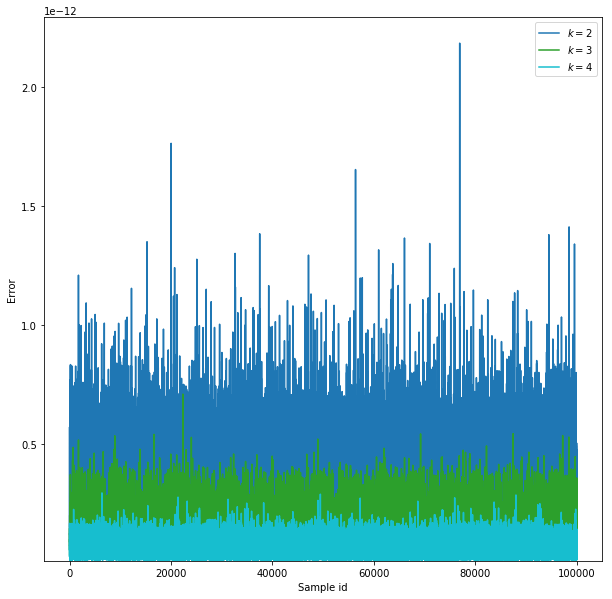

In [37]:


T = 100000

X   = np.random.multivariate_normal(mean=np.zeros(k), cov=10000.*np.eye(k), size=T)
Vel = np.random.multivariate_normal(mean=np.zeros(k), cov=12000.1*np.eye(k), size=T)

X_ = X + Vel

# First Move then encode
Q  = map_to_hypertorus(B, Z, X_ )

# First encode then shift
Vel_2d = pipe_through_tensor(A,Vel)
P  = map_to_hypertorus(B, Z, X )
Q_ = apply_velocity(P, Vel_2d)  


md2 = M_dist(Q, Q_, S=S)

plt.figure(figsize=(10,10))
plt.plot(md,  color= 'C0', label="$k=2$")
plt.plot(md3,  color= 'C2', label="$k=3$")
plt.plot(md2,  color= 'C9', label="$k=4$")
plt.legend()
plt.ylim(0.00000000000001)
plt.xlabel("Sample id")
plt.ylabel("Error")
plt.savefig("media/summary/pathint_k234_error.png".format(k,m), dpi=50)
plt.show()


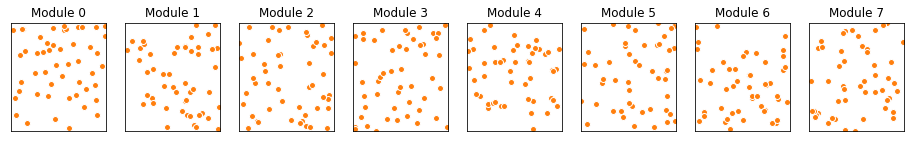

In [20]:



fig, ax = plt.subplots(1, m, figsize=(2*m, 2));
for i in range(m):
    ax[i].set_xlim(0,1)
    ax[i].set_ylim(0,1)

    ax[i].set_xticks([])
    ax[i].set_yticks([])


    ax[i].scatter(Q[:50,i,0],Q[:50,i,1],   edgecolor='white')
    ax[i].scatter(Q_[:50,i,0],Q_[:50,i,1], edgecolor='white')
    ax[i].set_title("Module {}".format(i))

plt.show()


In [21]:
Pr = np.zeros((2, k))
Pr[0,0] = 1.
Pr[1,1] = 1. 

Pr_ = np.zeros((m,2,k))
for i in range(m):
    Pr_[i] = np.dot(A[i], B[i])
    
    
 

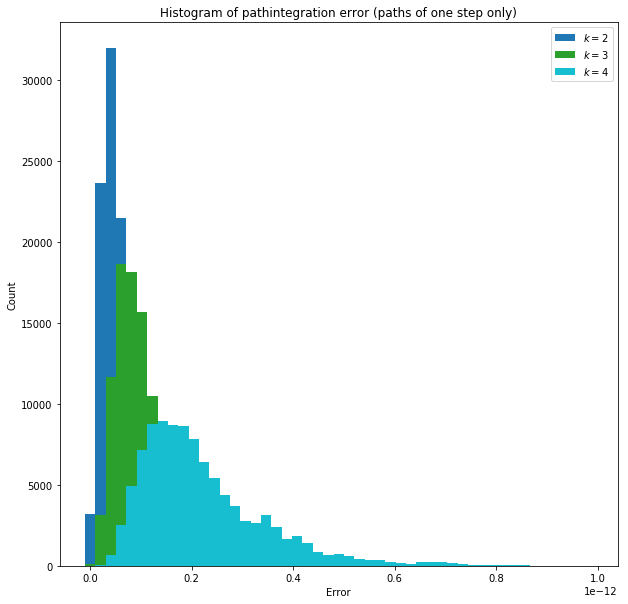

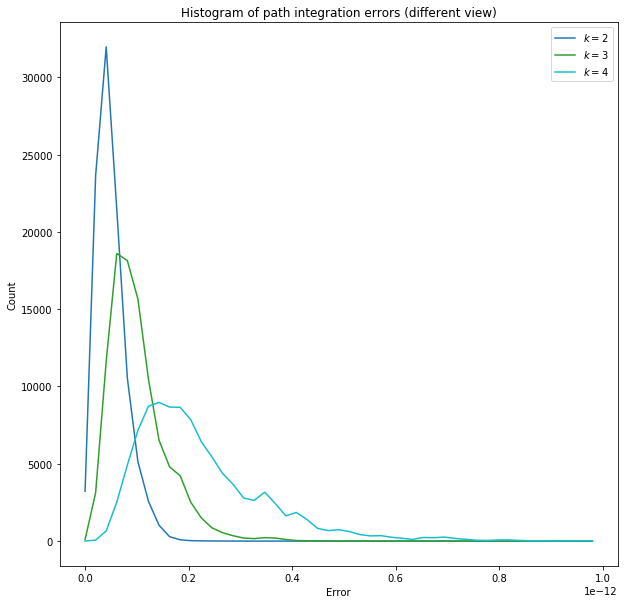

In [38]:
plt.figure(figsize=(10,10))
plt.title("Histogram of pathintegration error (paths of one step only)")
bins = np.linspace(0.0,0.000000000001, num=50)
# plt.hist([md,md3,md2] , 
#          label=["$k=4$","f"], 
#          color= ['C0','C2','C9'], 
#          bins=bins, 
#          align='left', 
#          rwidth=1.,
#          histtype = "bar"
#         )


x2,_,_ = plt.hist(md2, label="$k=2$", color= 'C0',  bins=bins, align='left', rwidth=1.)
x3,_,_ = plt.hist(md3, label="$k=3$", color= 'C2' , bins=bins, align='left', rwidth=1.)
x4,_,_ = plt.hist(md,  label="$k=4$", color= 'C9',  bins=bins, align='left', rwidth=1.)
plt.legend()
plt.xlabel("Error")
plt.ylabel("Count")
plt.savefig("media/summary/pathint_k234_hist.png".format(k,m), dpi=50)
plt.show()

plt.figure(figsize=(10,10))
plt.title("Histogram of path integration errors (different view)")
plt.plot(bins[:-1], x2,  label="$k=2$", color= 'C0')
plt.plot(bins[:-1], x3,  label="$k=3$", color= 'C2')
plt.plot(bins[:-1], x4,  label="$k=4$", color= 'C9')
plt.legend()
plt.xlabel("Error")
plt.ylabel("Count")
plt.savefig("media/summary/pathint_k234_graph_hist.png".format(k,m), dpi=50)